In [1]:
from PIL import Image

In [2]:
import pandas as pd

In [3]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv('dataset.csv')

In [5]:
dataframe

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path
0,0,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.861789,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
1,1,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.830097,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
2,2,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.780928,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
3,3,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.720430,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
4,4,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0287.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg02...,1,0.863874,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
...,...,...,...,...,...,...,...
2815,250,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,8,0.849624,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2816,251,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,9,0.820433,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2817,252,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,10,0.863222,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2818,253,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,11,0.865385,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...


In [24]:
np.array(tifffile.imread(img_path)).shape

(2, 1010, 1010)

In [31]:
idx=900
img_path = dataframe.iloc[idx, -1]
image = tifffile.imread(img_path)
# if we want to do mapping to values between 0-1, uncomment the following for the scaling
#image = np.array(image)/65535.0
#image = np.array(image)/1.0
# image = Image.fromarray(image)
# label = self.dataframe.iloc[idx, -2]
# label = torch.tensor(label, dtype=torch.float).reshape(-1, 1)

In [42]:
original = image[0]
mask = image[1]

# Normalize the original image (grayscale values from 0-255 to 0-1)
original_normalized = original / 255.0

# Ensure mask is binary (0 or 1)
mask_binary = (mask > 0).astype(np.float32)

# Stack the normalized image and binary mask
combined = np.stack([original_normalized, mask_binary], axis=2)

# Convert to tensor
tensor_transform = transforms.ToTensor()
tensor_image = tensor_transform(combined)

# Optional: you might want to add channel-wise normalization here
# normalize = transforms.Normalize(mean=[0.5, 0.5], std=[0.5, 0.5])
# tensor_image = normalize(tensor_image)


In [46]:
import torch

In [50]:
label = dataframe.iloc[idx, -2]
#label = torch.tensor(label, dtype=torch.float).reshape(-1, 1)

In [51]:
jaccard_tensor = torch.tensor(label, dtype=torch.float32)

In [53]:
jaccard_tensor

tensor(0.9177)

In [49]:
label

tensor([0.9177])

In [40]:
tensor_image.shape

torch.Size([2, 1010, 1010])

In [43]:
tensor_image

tensor([[[0.5098, 0.5137, 0.5176,  ..., 0.4902, 0.4980, 0.4980],
         [0.5176, 0.5176, 0.5176,  ..., 0.4902, 0.4980, 0.5020],
         [0.5216, 0.5255, 0.5216,  ..., 0.4980, 0.5020, 0.5020],
         ...,
         [0.5451, 0.5412, 0.5451,  ..., 0.4667, 0.4667, 0.4627],
         [0.5490, 0.5451, 0.5451,  ..., 0.4627, 0.4627, 0.4627],
         [0.5529, 0.5451, 0.5412,  ..., 0.4627, 0.4588, 0.4588]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       dtype=torch.float64)

In [34]:
image[1]/1.0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
image[0]/255

array([[0.50980392, 0.51372549, 0.51764706, ..., 0.49019608, 0.49803922,
        0.49803922],
       [0.51764706, 0.51764706, 0.51764706, ..., 0.49019608, 0.49803922,
        0.50196078],
       [0.52156863, 0.5254902 , 0.52156863, ..., 0.49803922, 0.50196078,
        0.50196078],
       ...,
       [0.54509804, 0.54117647, 0.54509804, ..., 0.46666667, 0.46666667,
        0.4627451 ],
       [0.54901961, 0.54509804, 0.54509804, ..., 0.4627451 , 0.4627451 ,
        0.4627451 ],
       [0.55294118, 0.54509804, 0.54117647, ..., 0.4627451 , 0.45882353,
        0.45882353]])

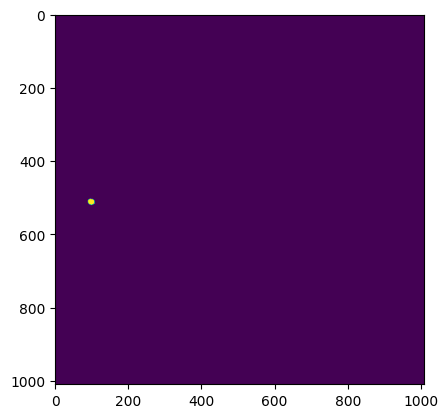

In [10]:
plt.imshow(image[1])

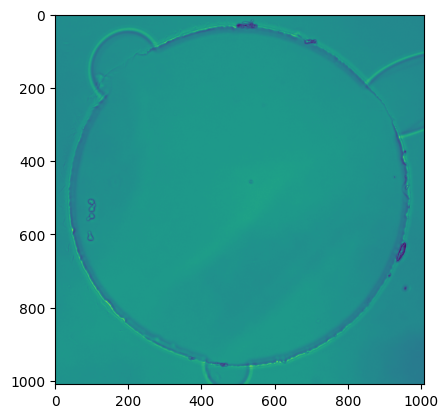

In [11]:
plt.imshow(image[0])

In [5]:
from torchvision.transforms import functional as TF
from torchvision import transforms, datasets

In [6]:
train_transform = transforms.Compose([
            #transforms.Resize((min_width, min_height)),
            transforms.ToTensor(),
            #transforms.Normalize(mean=mean, std=std)
            ])

In [12]:
transformed_image = train_transform(image)

In [26]:
image.shape

(2, 1010, 1010)

In [14]:
transformed_image.shape

torch.Size([1010, 2, 1010])

In [41]:
image = np.array(image)/1.0

In [18]:
bird_image = Image.open('bird.jpg')

In [23]:
bird_as_np = np.array(bird_image)

In [29]:
bird_as_np.shape

(427, 640, 3)

In [24]:
transformed_bird = train_transform(bird_as_np)

In [25]:
transformed_bird.shape

torch.Size([3, 427, 640])

In [21]:
mask_file = dataframe.iloc[idx, 1]
gt_source_file = dataframe.iloc[idx, 2]
gt_mask_file = dataframe.iloc[idx, 3]
label = dataframe.iloc[idx, 4]
j_value = dataframe.iloc[idx, 5]
merged_image = merge_source_with_mask(mask_file, gt_source_file, gt_mask_file, label, j_value)

NameError: name 'tifffile' is not defined

In [15]:
img_path

'test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/01_RES/mask1162_7.tif'

In [20]:
def get_label_mask(
    pred_masks: np.ndarray,
    gt_mask: np.ndarray,
    label: int,
    j_value: float,
) -> np.ndarray:
    """
    Get the predicted mask for a specific label.

    Args:
        pred_masks (np.ndarray): Predicted masks array.
        gt_mask (np.ndarray): Ground truth mask array.
        label (int): Label to use for masking.
        j_value (float): Expected Jaccard score.

    Returns:
        Tuple[Optional[np.ndarray], Optional[int]]: Predicted mask for the given label and the used label,
        or (None, None) if not found.
    """
    unique_mask_labels = np.unique(pred_masks)
    # check if the label even has mask
    if j_value == 0:
        empty_mask = np.zeros_like(pred_masks)
        return empty_mask
    # Try the given label first
    if label in unique_mask_labels:
        exp_pred_mask = pred_masks == label
        calculated_j_value = np.round(jaccard_score(gt_mask, exp_pred_mask, average="micro"),6)
        if calculated_j_value == j_value:
            return exp_pred_mask

    # If not found, try other labels
    for mask_label in unique_mask_labels:
        exp_pred_mask = pred_masks == mask_label
        calculated_j_value = np.round(jaccard_score(gt_mask, exp_pred_mask, average="micro"),6)
        if calculated_j_value == j_value:
            return exp_pred_mask

    return None

In [19]:
def merge_source_with_mask(mask_file, gt_source_file, gt_mask_file, label, j_value):
    gt_source = tifffile.imread(gt_source_file)
    gt_masks = tifffile.imread(gt_mask_file)
    gt_mask = gt_masks == label
    pred_masks = tifffile.imread(mask_file)
    pred_mask, used_label = get_label_mask(pred_masks, gt_mask, label, j_value)
    if pred_mask is None:
        raise Exception(f"no label mapping found for {mask_file}, with {label}, found")
    else:
        return np.stack([gt_source, pred_mask], axis=0), used_label

In [16]:
np.array(image).shape

(1010, 1010)